## Install Chart_Studio library

In [0]:
!pip install chart_studio        # Install chart_studio for plotly plot

     |████████████████████████████████| 71kB 2.3MB/s 


## Import libraries

In [0]:
import pandas as pd                                                                      # Import pandas library for dataframe operation
import numpy as np                                                                       # Import numpy library for array opertaion
from sklearn.feature_extraction import text                                              # Import text library from sklearn 
from sklearn.model_selection import train_test_split                                     # Import train_test_split library to divide input data into train & test 
from sklearn.ensemble import RandomForestClassifier                                      # Import RandomForestClassifer ML model from sklearn
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score      # Import classification_report ,confusion_matrix and accuracy_score for ML model evaluation
from sklearn import model_selection, naive_bayes, svm                                    # Import naive_bayes & SVM ML Model from sklearn
from sklearn.tree import DecisionTreeClassifier                                          # Import DecisionTreeClassifier ML model from sklearn
from sklearn.svm import SVC                                                              # Import SVC ML model from sklearn
from xgboost import XGBClassifier                                                        # Import XGBClassifier ML model from sklearn
from sklearn.metrics import plot_confusion_matrix                                        # Import plot_confusion_matrix from sklearn
from sklearn.feature_extraction.text import CountVectorizer                              # Import CountVectorizer library for text vectorization
from sklearn.feature_extraction.text import TfidfVectorizer                              # Import TfidfVectorizer library for text vectorization
import warnings                                                                          # Import warnings
warnings.filterwarnings('ignore')                
import matplotlib                                                                        # Import matplotlib for various plot 
import matplotlib.pyplot as plt 
import seaborn as sns                                                                    # Import seaborn for various plot
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10.0, 6.0)
import chart_studio.plotly as py                                                         # Import chart_studio for various plotly plot
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly.offline import iplot
import plotly.io as pio
pio.renderers.default = 'colab'

## Mount google drive at mydrive\data folder path

In [3]:
#from google.colab import drive     # Import drive for set input file for loading to colab
#drive.mount('/content/gdrive')

## Loading COVID-19 Clean text from google drive folder

In [0]:
clean_df = pd.read_csv('../data/sentiment_twitter_data.csv')      # read input dataset 

In [0]:
clean_df.head()

,Unnamed: 0,Tweet_date,Tweet_time,Tweet_City,Tweet_Country,Tweet_account,Retweet_count,Tweet_Text,Created Date,tweeted_day_of_week,created_at_hour,neg,neu,pos,vader_polarity,sentiment,temp_list
0,0,4/1/2020,0:08:00,NaN,Australia,GSK_AU,0,ask award research excellence open nomination ...,2020-04-01 00:08:00,Wednesday,0,0.000,0.297,0.703,0.9349,positive,"['ask', 'award', 'research', 'excellence', 'op..."
1,1,4/1/2020,0:35:00,NaN,Australia,GSK_AU,3,award research excellence open nomination awar...,2020-04-01 00:35:00,Wednesday,0,0.000,0.419,0.581,0.9022,positive,"['award', 'research', 'excellence', 'open', 'n..."
2,2,4/1/2020,0:45:00,Basel,Switzerland,Novartis News,31,face global crisis novartis mobilized ramp cap...,2020-04-01 00:45:00,Wednesday,0,0.291,0.709,0.000,-0.6249,negative,"['face', 'global', 'crisis', 'novartis', 'mobi..."
3,3,4/1/2020,0:46:00,Basel,Switzerland,Novartis News,2,information response visit,2020-04-01 00:46:00,Wednesday,0,0.000,1.000,0.000,0.0000,neutral,"['information', 'response', 'visit']"
4,4,4/1/2020,0:59:00,Basel,Switzerland,Novartis News,4,clinical investigation assessing portfolio exi...,2020-04-01 00:59:00,Wednesday,0,0.000,1.000,0.000,0.0000,neutral,"['clinical', 'investigation', 'assessing', 'po..."


In [0]:
stop_words2 = text.ENGLISH_STOP_WORDS.union(['ttp', 'amp','dm'])         # Adding few more words like(ttp,amp,dm) into stop_words library

## Getting Tweet_Text Feature value

In [0]:
X = clean_df.iloc[:, 6].values     # get Tweet_Text column values

## Getting Sentiment Target Values

In [0]:
y = clean_df.iloc[:, -1].values

## Apply TF-IDF Vectorization on Tweet_Text Column

In [0]:
tfidfconverter = TfidfVectorizer(max_features=2000, min_df=5, max_df=0.7, stop_words=stop_words2) 
X = tfidfconverter.fit_transform(X).toarray()

## Spliting Data into Train and Test Set

In [0]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Random Forest Classfication model for Sentiment Classification

In [0]:
RF_classifier = RandomForestClassifier(n_estimators=100, random_state=0)    # Create RF_classifier object 
RF_classifier.fit(X_train, y_train)                                         # Fit the RF Classifier model to train dataset

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [0]:
predict_RF = RF_classifier.predict(X_test)                                # Prediction on the test data 

In [0]:
cm_RF = confusion_matrix(y_test,predict_RF)     
print(cm_RF)                                          # Print confusion Matrix for RF Classifier model
print(classification_report(y_test,predict_RF))       # print classification_report for RF Classifier model
Acc_RF = accuracy_score(y_test, predict_RF)*100        
print(Acc_RF)                                         # print accuracy_score for RF Classifier model

[[672  93  30]
 [ 27 951  19]
 [ 41 105 807]]
              precision    recall  f1-score   support

    negative       0.91      0.85      0.88       795
     neutral       0.83      0.95      0.89       997
    positive       0.94      0.85      0.89       953

    accuracy                           0.89      2745
   macro avg       0.89      0.88      0.88      2745
weighted avg       0.89      0.89      0.89      2745

88.52459016393442


__Conclusion__ : Accuracy Score of RandomForest Classifier is __88.52%__

## Confusion Matrix Plot for RF Classifier Model

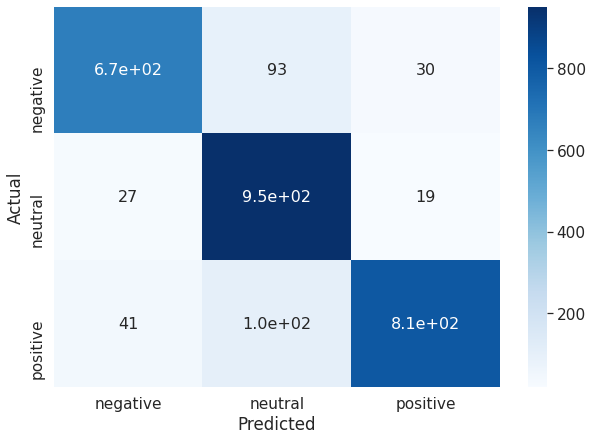

In [0]:
data = confusion_matrix(y_test, predict_RF)
df_cm = pd.DataFrame(data, columns=np.unique(y_test), index = np.unique(y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})

## DecisionTree Classification Model for Sentiment Classification

In [0]:
DT_Classifier = DecisionTreeClassifier()                        # Create Decision Tree Classifier object
DT_Classifier.fit(X_train, y_train)                             # Fit the DecisionTree Classifier model to train dataset

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [0]:
prediction_de = DT_Classifier.predict(X_test)                           # Predict on the test data

In [0]:
cm_DT = confusion_matrix(y_test,prediction_de)     
print(cm_DT)                                             # Print confusion Matrix for DecisionTree Classifier model
print(classification_report(y_test,prediction_de))       # print classification_report for DecisionTree Classifier model
Acc_DT = accuracy_score(y_test, prediction_de)*100        
print(Acc_DT)                                            # print accuracy_score for DecisionTree Classifier model

[[669  82  44]
 [ 62 876  59]
 [ 53 100 800]]
              precision    recall  f1-score   support

    negative       0.85      0.84      0.85       795
     neutral       0.83      0.88      0.85       997
    positive       0.89      0.84      0.86       953

    accuracy                           0.85      2745
   macro avg       0.86      0.85      0.85      2745
weighted avg       0.86      0.85      0.85      2745

85.42805100182149


__Conclusion__: Accuracy score of Decision Tree Classification model is __85.43%__

## Confusion Matrix Plot for DecisionTree Classifier Model

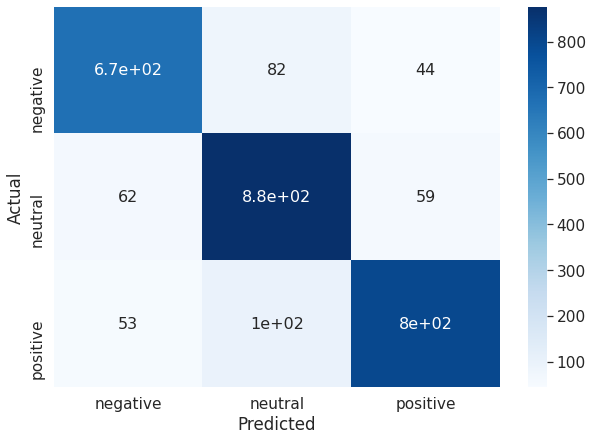

In [0]:
data = confusion_matrix(y_test,prediction_de)
df_cm = pd.DataFrame(data, columns=np.unique(y_test), index = np.unique(y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})

## SVM Classification Model for Sentiment Classification(Kernal function=rbf)

In [0]:
svm_classifier = SVC()                                      # Create SVM Classifier object
svm_classifier.fit(X_train, y_train)                        # Fit the SVM classification model on train dataset
prediction_svm = svm_classifier.predict(X_test)             # Predict on test data

In [0]:
cm_SVM = confusion_matrix(y_test,prediction_svm)     
print(cm_SVM)                                             # Print confusion Matrix for SVM Classifier model
print(classification_report(y_test,prediction_svm))       # print classification_report for SVM Classifier model
Acc_SVM = accuracy_score(y_test, prediction_svm)*100        
print(Acc_SVM)                                            # print accuracy_score for SVM Classifier model

[[637 128  30]
 [ 23 938  36]
 [ 22 125 806]]
              precision    recall  f1-score   support

    negative       0.93      0.80      0.86       795
     neutral       0.79      0.94      0.86       997
    positive       0.92      0.85      0.88       953

    accuracy                           0.87      2745
   macro avg       0.88      0.86      0.87      2745
weighted avg       0.88      0.87      0.87      2745

86.73952641165756


__Conclusion__: Accuaracy score of SVM Classification model(Kernal = rgf) is __86.74%__. 

## Confusion Matrix Plot for SVM(kernal = rgf) Classifier Model

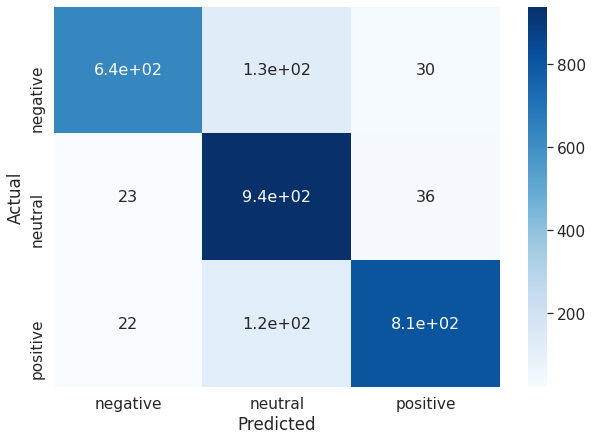

In [0]:
data = confusion_matrix(y_test,prediction_svm)
df_cm = pd.DataFrame(data, columns=np.unique(y_test), index = np.unique(y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})

## SVM Classification Model for Sentiment Classification(Kernal function=linear)

In [0]:
linear_svc = svm.SVC(kernel='linear')                      # Create SVM Classifier object
linear_svc.fit(X_train, y_train)                           # Fit the SVM classification model on train dataset

prediction_svm_linear = linear_svc.predict(X_test)         # predict on the test data

In [0]:
cm_SVM_linear = confusion_matrix(y_test,prediction_svm_linear)     
print(cm_SVM_linear)                                                 # Print confusion Matrix for SVM Classifier model
print(classification_report(y_test,prediction_svm_linear))           # print classification_report for SVM Classifier model
Acc_SVM_linear = accuracy_score(y_test, prediction_svm_linear)*100        
print(Acc_SVM_linear)                                                # print accuracy_score for SVM Classifier model

[[637 131  27]
 [ 24 948  25]
 [ 37 126 790]]
              precision    recall  f1-score   support

    negative       0.91      0.80      0.85       795
     neutral       0.79      0.95      0.86       997
    positive       0.94      0.83      0.88       953

    accuracy                           0.87      2745
   macro avg       0.88      0.86      0.86      2745
weighted avg       0.88      0.87      0.87      2745

86.52094717668488


__Conclusion__: Accuaracy score of SVM Classification model(Kernal = linear) is __86.52%__. 

## Confusion Matrix Plot for SVM(kernal = linear) Classifier Model

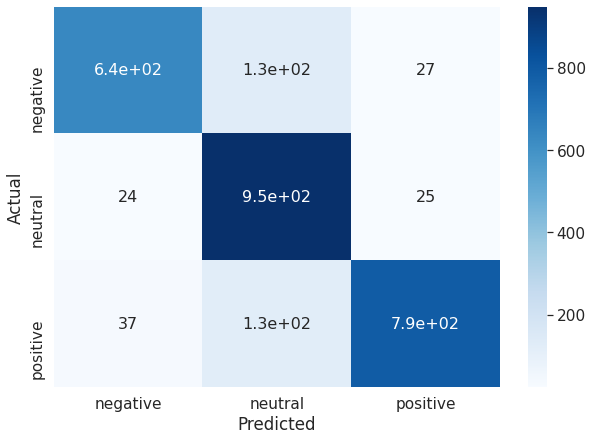

In [0]:
data = confusion_matrix(y_test,prediction_svm_linear)
df_cm = pd.DataFrame(data, columns=np.unique(y_test), index = np.unique(y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})

## XG Boost Classification Model for Sentiment Classification

In [0]:
XGbg_Classifier = XGBClassifier()                                   # create XGBClassifier object
XGbg_Classifier .fit(X_train, y_train)                              # fit XGBClassifier model on train dataset

prediction_xg = XGbg_Classifier .predict(X_test)                    # predict on test data

In [0]:
cm_XGbg = confusion_matrix(y_test,prediction_xg)     
print(cm_XGbg)                                                       # Print confusion Matrix for XG Boost Classifier model
print(classification_report(y_test,prediction_xg))                   # print classification_report for XG Boost Classifier model
Acc_XGbg = accuracy_score(y_test, prediction_xg)*100        
print(Acc_XGbg)                                                      # print accuracy_score for XG Boost Classifier model

[[441 292  62]
 [ 22 964  11]
 [ 24 389 540]]
              precision    recall  f1-score   support

    negative       0.91      0.55      0.69       795
     neutral       0.59      0.97      0.73       997
    positive       0.88      0.57      0.69       953

    accuracy                           0.71      2745
   macro avg       0.79      0.70      0.70      2745
weighted avg       0.78      0.71      0.70      2745

70.85610200364299


__Conclusion__: Accuaracy score of XG Boost Classification model is __70.86%__. 

## Confusion Matrix Plot for XG Boost Classifier Model

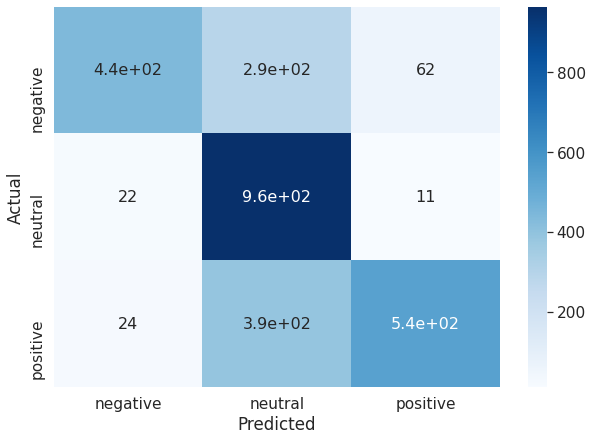

In [0]:
data = confusion_matrix(y_test,prediction_xg)
df_cm = pd.DataFrame(data, columns=np.unique(y_test), index = np.unique(y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})

## Naive Bayes Classification model for sentiment Classification

In [0]:
Naive_Classifier = naive_bayes.MultinomialNB()                         # create multi-classifer Naive Bayes Classifier object
Naive_Classifier .fit(X_train,y_train)                                 # fit multi-classifer Naive Bayes Classifer model on train dataset
prediction_NB = Naive_Classifier .predict(X_test)                      # predict on test data

In [0]:
cm_NB = confusion_matrix(y_test,prediction_NB)     
print(cm_NB)                                                         # Print confusion Matrix for XG Boost Classifier model
print(classification_report(y_test,prediction_NB))                   # print classification_report for XG Boost Classifier model
Acc_NB = accuracy_score(y_test, prediction_NB)*100        
print(Acc_NB)                                                        # print accuracy_score for XG Boost Classifier model

[[595 111  89]
 [ 60 806 131]
 [ 38 119 796]]
              precision    recall  f1-score   support

    negative       0.86      0.75      0.80       795
     neutral       0.78      0.81      0.79       997
    positive       0.78      0.84      0.81       953

    accuracy                           0.80      2745
   macro avg       0.81      0.80      0.80      2745
weighted avg       0.80      0.80      0.80      2745

80.03642987249545


__Conclusion__: Accuaracy score of Multi-Class Naive Bayes Classification model(Kernal = linear) is __80.04%__. 

## Confusion Matrix Plot for Multi-Class Naive Bayes Classifier Model

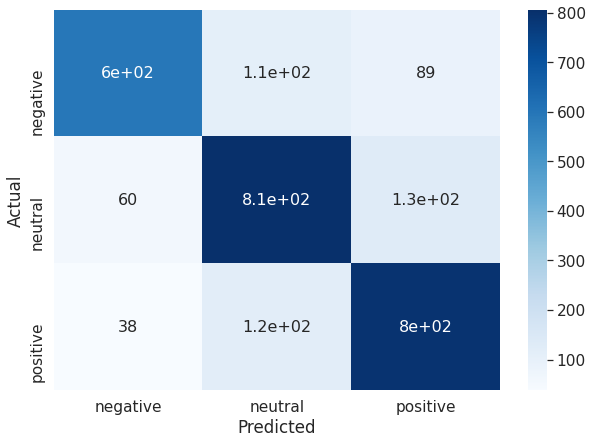

In [0]:
data = confusion_matrix(y_test,prediction_NB)
df_cm = pd.DataFrame(data, columns=np.unique(y_test), index = np.unique(y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})

## BarPlot for ML Classification Model Comparison

In [74]:
# Plot shows the Comparison of Different ML Classification model for Correct Prediction of Sentiment (Positive/Negative/Neutral) Tweet count
trace1 = {
  "name": "Negative", 
  "type": "bar", 
  "x": ["Random Forest", "Decision Tree", "SVM_rgf", "SVM_linear", "XGBoost","Naive_Bayes_Multi"], 
  "y": [cm_RF[0,0],cm_DT[0,0], cm_SVM[0,0], cm_SVM_linear[0,0], cm_XGbg[0,0], cm_NB[0,0]]
}
trace2 = {
  "name": "Neutral", 
  "type": "bar", 
  "x": ["Random Forest", "Decision Tree", "SVM_rgf", "SVM_linear", "XGBoost","Naive_Bayes_Multi"],
  "y": [cm_RF[1,1],cm_DT[1,1], cm_SVM[1,1], cm_SVM_linear[1,1], cm_XGbg[1,1], cm_NB[1,1]]
}
trace3 = {
  "name": "Positive", 
  "type": "bar", 
  "x": ["Random Forest", "Decision Tree", "SVM_rgf", "SVM_linear", "XGBoost","Naive_Bayes_Multi"], 
  "y": [cm_RF[2,2],cm_DT[2,2], cm_SVM[2,2], cm_SVM_linear[2,2], cm_XGbg[2,2], cm_NB[2,2]]
}

data = [trace1, trace2,trace3]
layout = go.Layout(barmode = "group",title= 'ML Model Correct Prediction Tweet sentiment Comparison')
fig = go.Figure(data=data, layout=layout)
iplot(fig)

__Conclusion__: __Random Forest__ Model Predicted __672__ Correct Negative Tweet which is highest corresponding to other model. __XG Boost__ Model Predicted __964__ Correct Neutral Tweet which is highest corresponding to other model. __Random Forest__ model Predicted __807__ Correct Positive Tweet which is highest corresponding to other model.

In [73]:
# Plot shows the Comparison of Different ML Classification model for Evaluation metrics of Negative sentiment label
trace1 = {
  "name": "Accuracy", 
  "type": "bar", 
  "x": ["Random Forest", "Decision Tree", "SVM_rgf", "SVM_linear", "XGBoost","Naive_Bayes_Multi"], 
  "y": [Acc_RF,Acc_DT, Acc_SVM, Acc_SVM_linear, Acc_XGbg, Acc_NB]
}

trace2 = {
  "name": "Precision", 
  "type": "bar", 
  "x": ["Random Forest", "Decision Tree", "SVM_rgf", "SVM_linear", "XGBoost","Naive_Bayes_Multi"], 
  "y": [91,85, 93, 91, 91, 86]
}

trace3 = {
  "name": "Recall", 
  "type": "bar", 
  "x": ["Random Forest", "Decision Tree", "SVM_rgf", "SVM_linear", "XGBoost","Naive_Bayes_Multi"], 
  "y": [85,84, 80, 80, 55, 75]
}

trace4 = {
  "name": "F1-score", 
  "type": "bar", 
  "x": ["Random Forest", "Decision Tree", "SVM_rgf", "SVM_linear", "XGBoost","Naive_Bayes_Multi"], 
  "y": [88,85, 86, 85, 69, 80]
}

data = [trace1,trace2,trace3,trace4]
layout = go.Layout(barmode = "group",title= 'ML Model Evaluation Metrics Comparision on Negative Tweet sentiment ')
fig = go.Figure(data=data, layout=layout)
iplot(fig)

__Conclusion__: __Random Forest__ model has __88.52%__ Accuracy which is higher than remaining other ML model. __SVM_rgf__ model has __93%__ precision which is higher than remaining other ML model. __Random Forest__ model has __85%__ recall score which is higher than remaining other ML model. __Random Forest__ model has __88%__ F1-score which is higher than remaining other ML model.

In [72]:
# Plot shows the Comparison of Different ML Classification model for Evaluation metrics of Positive sentiment label
trace1 = {
  "name": "Accuracy", 
  "type": "bar", 
  "x": ["Random Forest", "Decision Tree", "SVM_rgf", "SVM_linear", "XGBoost","Naive_Bayes_Multi"], 
  "y": [Acc_RF,Acc_DT, Acc_SVM, Acc_SVM_linear, Acc_XGbg, Acc_NB]
}

trace2 = {
  "name": "Precision", 
  "type": "bar", 
  "x": ["Random Forest", "Decision Tree", "SVM_rgf", "SVM_linear", "XGBoost","Naive_Bayes_Multi"], 
  "y": [94,89, 92, 94, 88, 78]
}

trace3 = {
  "name": "Recall", 
  "type": "bar", 
  "x": ["Random Forest", "Decision Tree", "SVM_rgf", "SVM_linear", "XGBoost","Naive_Bayes_Multi"], 
  "y": [85,84, 85, 83, 57, 84]
}

trace4 = {
  "name": "F1-score", 
  "type": "bar", 
  "x": ["Random Forest", "Decision Tree", "SVM_rgf", "SVM_linear", "XGBoost","Naive_Bayes_Multi"], 
  "y": [89,86, 88, 88, 69, 81]
}

data = [trace1,trace2,trace3,trace4]
layout = go.Layout(barmode = "group",title= 'ML Model Evaluation Metrics Comparision on Positive Tweet sentiment ')
fig = go.Figure(data=data, layout=layout)
iplot(fig)

__Conclusion__: __Random Forest__ model has __88.52%__ Accuracy which is higher than remaining other ML model. __SVM_linear__ & __Random_Forest__ model has __94%__ precision which is higher than remaining other ML model. __Random Forest__ model has __85%__ recall score which is higher than remaining other ML model. __Random Forest__ model has __89%__ F1-score which is higher than remaining other ML model.

In [75]:
# Plot shows the Comparison of Different ML Classification model for Evaluation metrics of Neutral sentiment label
trace1 = {
  "name": "Accuracy", 
  "type": "bar", 
  "x": ["Random Forest", "Decision Tree", "SVM_rgf", "SVM_linear", "XGBoost","Naive_Bayes_Multi"], 
  "y": [Acc_RF,Acc_DT, Acc_SVM, Acc_SVM_linear, Acc_XGbg, Acc_NB]
}

trace2 = {
  "name": "Precision", 
  "type": "bar", 
  "x": ["Random Forest", "Decision Tree", "SVM_rgf", "SVM_linear", "XGBoost","Naive_Bayes_Multi"], 
  "y": [83,83, 79, 79, 59, 78]
}

trace3 = {
  "name": "Recall", 
  "type": "bar", 
  "x": ["Random Forest", "Decision Tree", "SVM_rgf", "SVM_linear", "XGBoost","Naive_Bayes_Multi"], 
  "y": [95,88, 94, 95, 97, 81]
}

trace4 = {
  "name": "F1-score", 
  "type": "bar", 
  "x": ["Random Forest", "Decision Tree", "SVM_rgf", "SVM_linear", "XGBoost","Naive_Bayes_Multi"], 
  "y": [89,85, 86, 86, 73, 79]
}

data = [trace1,trace2,trace3,trace4]
layout = go.Layout(barmode = "group",title= 'ML Model Evaluation Metrics Comparision on Neutral Tweet sentiment ')
fig = go.Figure(data=data, layout=layout)
iplot(fig)

__Conclusion__: __Random Forest__ model has __88.52%__ Accuracy which is higher than remaining other ML model. __Decision Tree__ & __Random_Forest__ model has __83%__ precision which is higher than remaining other ML model. __XG Boost__ model has __97%__ recall score which is higher than remaining other ML model. __Random Forest__ model has __89%__ F1-score which is higher than remaining other ML model.